Student Name: Haneen Jawad El-Hamad, DAND 4

# Project: No-Show appointments in Brazil data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Health systems around the world require continuous developing in order to achieve satisfaction of the patients. in Brazil, data was collected patients' appointments that were scheduled and data about the actual appointment along with information about the patients. This project aims to investigate this dataset in order to help predict whether the patient will show up for the scheduled appointment or not.

Independant variables were selected as:
1. number of appointments per patient
2. scholarship
3. age
4. cronic diseases and handicap
5. recieving an sms before the appointment

Questions to investigate: 
* Do patients with more appointments commit more than those with less?
* Does having a scholarship increase the probability of showing at appointments?
* Does the age of the patient affect their commitment to show or not?
* Does the handicap level (from 0 to 4) and cronic diseases affect patients showing at appointments
* Does an sms reminder help patients show more ?

Conclusions were made in the last section to assess the ability to predict whether a patient will show or not.



In [2]:
#import statements for all of the packages used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

The data was imported as shown below, the columns descriptiona are as follows (resource: https://www.kaggle.com/joniarroba/noshowappointments )

| Column Name | Column Description |
| :- | :- |
| PatientId | Identification of a patien
| AppointmentID | Identification of each appointment
| Gender | Male or Female
| ScheduledDay | The day someone called or registered the appointment, this is before appointment of course.
| AppointmentDay | The day of the actuall appointment, when they have to visit the doctor.
| Age | Age of the patient
| Neighbourhood	 | Where the appointment takes place.
| Scholarship | True of False, Whether the patient has a Bolsa Familia insurance in Brazil or not. 
| Hipertension | True of False
| Diabetes | True of False
| Alcoholism | True of False
| Handcap | Handicap level from  to 4
| SMS_received | 1 or more messages sent to the patient
| No-show | True of False (True means the patient didn't show)

### General Properties

The data has about 110527 entries, There are no missing data, However it requires some cleaning as shown in the next section.

In [3]:
# Load your data and print out a few lines
df = pd.read_csv('appointments_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# data types of columns, existence of null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning 
Data cleaning includes:

1) Column Data types:
* Columns, `ScheduledDay` and `AppointmentDay` are object data types should be changed to datetime type
* `No-Show` column data type should be changed from object to integer

2) Duplicates should be tested and removed

3) Some columns should be renamed to avoid spelling mistakes

4) Drop columns that won't be used in the analysis

5) Checking for incorrect data

In [5]:
# processing date columns

S = df['ScheduledDay'].str.split("T", n=1, expand = True)
A = df['AppointmentDay'].str.split("T", n=1, expand = True)

In [6]:
# checking if there are time entries for appointment day column, 
#if not, time in scheduled day will be removed and not used in the analysis

A[1].nunique()


1

In [7]:
#replacing columns, `ScheduledDay` and `AppointmentDay` with date only and changing type from string to datetime

df['ScheduledDay'] = pd.to_datetime(S[0])
df['AppointmentDay'] = pd.to_datetime(A[0])

In [8]:
# checking for duplicates and removing
df.duplicated().sum()

0

In [9]:
# renaming columns
df.rename(columns={"PatientId": "PatientID", "Hipertension": "Hypertension", "Handcap":"Handicap","No-show":"Show"}, inplace=True)
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# replace yes and no values with integers, yes replaced with 0, the patient didn't show to the appointment, 
# and No replaced with 1, the patient did show, then change type of column into bool
df['Show'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['Show'].replace(to_replace = ['Yes', 'No'],  value = [0,1], inplace = True)


In [12]:
df['Show'] = df['Show'].astype(int)
df['Show'].unique()

array([1, 0])

In [13]:
# 4) Drop columns that won't be used in the analysis

df.drop(['Gender', 'Neighbourhood'], axis=1,inplace=True) #,'ScheduledDay'
df.head(1)

,PatientID,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,2.987250e+13,5642903,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1


In [14]:
#5) Checking for incorrect data
df.describe()


,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


5) Checking for incorrect data

In the Age column, there appears to be 1 entry with -1 value , and 5 entries above 100 years. I will assume they are incorrect values and drop the rows

In [15]:
#checking how many rows with incorrect values
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [16]:
#removing rows
df = df.query('Age <=100 and Age >= 0')


Also, the handicap column has a range of values from 0-4, therefore checking if the values are incorrect. However it seems to indicative of the level of handicap

In [17]:
df.Handicap.value_counts()


0    108282
1      2038
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [18]:
#save the clean data

df.to_csv('clean_show_data.csv', index = False)
df.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientID       110519 non-null  float64       
 1   AppointmentID   110519 non-null  int64         
 2   ScheduledDay    110519 non-null  datetime64[ns]
 3   AppointmentDay  110519 non-null  datetime64[ns]
 4   Age             110519 non-null  int64         
 5   Scholarship     110519 non-null  int64         
 6   Hypertension    110519 non-null  int64         
 7   Diabetes        110519 non-null  int64         
 8   Alcoholism      110519 non-null  int64         
 9   Handicap        110519 non-null  int64         
 10  SMS_received    110519 non-null  int64         
 11  Show            110519 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(8)
memory usage: 10.5 MB


<a id='eda'></a>
## Exploratory Data Analysis


Questions to investigate:

* Do patients with more appointments commit more than those with less?
* Does having a scholarship increase the probability of showing at appointments?
* Does the age of the patient affect their commitment to show or not?
* Does the handicap level (from 0 to 4) and cronic diseases affect patients showing at appointments
* Does an sms reminder help patients show more ?



#### The editing of data to groupby Patient ID

The number of appointments per patient which ranges from 1 to  88 appointments while ensuring that Appointment ID numbers are unique for each patient was investigated, as well as the time frame of the data which is 27 days within 40 days. it is unlikely for a patient to visit or even schedule high numbers of appointments during this period. However, the average of number of appointments per patient in 1.77, 99.9% percentile of the number of the appointments is 17, therefore appointments above 20 per patient will be disregarded in the analysis. The records of 35 patients corresponding to 1531 records were removed.

In [19]:
# the number of appointments per patient unique values
df.groupby(['PatientID']).AppointmentID.count().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 11, 12, 51, 10, 20,  9, 84, 16, 19,
       15, 62, 13, 18, 21, 14, 17, 55, 23, 35, 38, 30, 24, 42, 37, 46, 70,
       65, 22, 57, 29, 34, 54, 40, 33, 88, 50], dtype=int64)

In [20]:
# number of unique appointment id for each patient is 1
df.groupby(['PatientID']).AppointmentID.value_counts().unique()

array([1], dtype=int64)

In [21]:
df.AppointmentDay.nunique()

27

In [22]:
df.AppointmentDay.max()-df.AppointmentDay.min()

Timedelta('40 days 00:00:00')

In [23]:
#number of appointments per patient
num_app = df.groupby(['PatientID'], as_index=False)['AppointmentID'].count()


In [24]:
# percentile of number of appointments per patient
np.percentile(num_app['AppointmentID'], [99.9,100]) 

array([17., 88.])

In [25]:
# return patients number of appointments more than 20, and remove corresponding rows from the main data frame
t = num_app.query('AppointmentID > 20')['PatientID'].tolist()
for i in range(len(t)):
    df.drop(df.PatientID[df.PatientID == t[i]].index, inplace=True)

In [26]:
#creating new dataframe with grouped patients

n_df = df.groupby(['PatientID'], as_index=False)['AppointmentID'].count()

n_df['num_shows']=df.groupby(['PatientID'], as_index=False).Show.sum()['Show']

n_df['percent'] = n_df['num_shows']/n_df['AppointmentID']*100

n_df.rename(columns={'AppointmentID':'appointments_count','percent':'percentage'}, inplace=True)

In [27]:
n_df['scholarship'] = df.groupby('PatientID', as_index=False)['Scholarship'].any()['Scholarship']
n_df['Age'] = df.groupby('PatientID', as_index=False).Age.mean()['Age']
n_df['Hypertension'] = df.groupby('PatientID', as_index=False).Hypertension.any()['Hypertension']
n_df['Diabetes'] = df.groupby('PatientID', as_index=False).Diabetes.any()['Diabetes']
n_df['Alcoholism']=df.groupby('PatientID', as_index=False).Alcoholism.any()['Alcoholism']
n_df['Handicap'] = df.groupby('PatientID', as_index=False).Handicap.mean()['Handicap']
n_df['num_sms'] = df.groupby('PatientID', as_index=False).SMS_received.sum()['SMS_received']
n_df['Age'] = n_df.Age.round(0)


n_df

,PatientID,appointments_count,num_shows,percentage,scholarship,Age,Hypertension,Diabetes,Alcoholism,Handicap,num_sms
0,3.921784e+04,1,1,100.0,False,44.0,False,False,False,0,0
1,4.374176e+04,1,1,100.0,False,39.0,False,True,False,0,0
2,9.377953e+04,1,1,100.0,False,33.0,False,False,False,0,0
3,1.417242e+05,1,1,100.0,False,12.0,False,False,False,0,0
4,5.376153e+05,1,1,100.0,False,14.0,False,False,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...
62254,9.999320e+14,5,5,100.0,False,90.0,False,False,False,0,2
62255,9.999350e+14,1,1,100.0,False,5.0,False,False,False,0,0
62256,9.999465e+14,1,1,100.0,True,65.0,True,False,False,0,0
62257,9.999686e+14,1,1,100.0,False,81.0,False,False,False,0,0


In [28]:
n_df.Handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

#### Do patients with more appointments commit more than those with less?

number of appointments seems indefinitive in predicting show or no show for the patient.

appointments_count
1     81.226923
2     79.305506
3     79.084848
4     77.842350
5     78.731010
6     78.028933
7     76.423903
8     77.103960
9     77.350427
10    80.352941
11    76.911977
12    75.925926
13    80.659341
14    76.948052
15    76.444444
16    75.000000
17    85.882353
18    75.000000
19    83.333333
20    73.125000
Name: percentage, dtype: float64

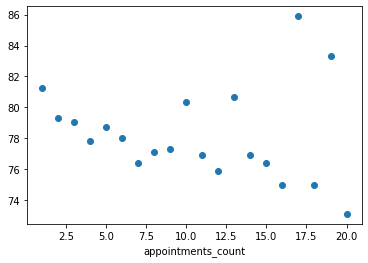

In [46]:
n_df.groupby('appointments_count').percentage.mean().plot(style='o')
n_df.groupby('appointments_count').percentage.mean()



#### Does having a scholarship increase the probability of showing at appointments?

Percentage of show is slightly lower for people with scholarship, however it seems indefinitive in predicting show or no show for the patient.

scholarship
False    80.655624
True     77.366691
Name: percentage, dtype: float64

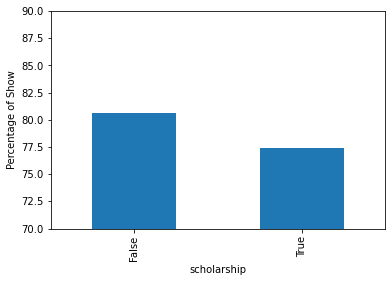

In [47]:
n_df.groupby('scholarship').percentage.mean().plot(kind='bar')
plt.xlabel('scholarship')
plt.ylabel('Percentage of Show')
plt.ylim([70,90])
n_df.groupby('scholarship').percentage.mean()

#### Does the age of the patient affect their commitment to show or not?

Age groups among patients were defined according to age percentiles, it seems that the most committed patients to show to appointments are older patients above 56 years old, 

In [31]:
# creating age groups to plot according to percentiles
n_df.Age.describe()

count    62259.000000
mean        36.701264
std         23.529003
min          0.000000
25%         17.000000
50%         36.000000
75%         56.000000
max        100.000000
Name: Age, dtype: float64

(70.0, 90.0)

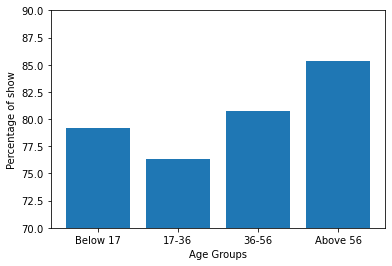

In [32]:
labels =['Below 17', '17-36', '36-56', 'Above 56']
g1 = n_df.query('Age <= 17').percentage.mean()
g2 = n_df.query('Age > 17 and Age <= 36').percentage.mean()
g3 = n_df.query('Age > 36 and Age <= 56').percentage.mean()
g4 = n_df.query('Age >56').percentage.mean()

plt.bar(labels, [g1,g2,g3,g4])
plt.xlabel("Age Groups") 
plt.ylabel("Percentage of show") 
plt.ylim([70,90])

#### Does the handicap level (from 0 to 4) and cronic diseases affect patients showing at appointments

* Patients with 3 or 4 Handicap conditions show less to appointments than patients with up to two types of handicap.
* Patients with Hypertension show more than patients who don't have the condition , and patients with diabetes show more as well, however with less variance than hypetension disease
* for patients who are alcoholic, they show less to appointments than patients who aren't

(50.0, 90.0)

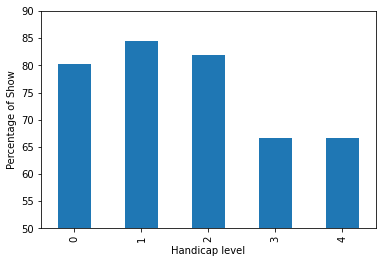

In [33]:
#Handicap level factor
n_df.groupby('Handicap').percentage.mean().plot(kind='bar')
plt.xlabel('Handicap level')
plt.ylabel('Percentage of Show')
plt.ylim([50,90])

(70.0, 90.0)

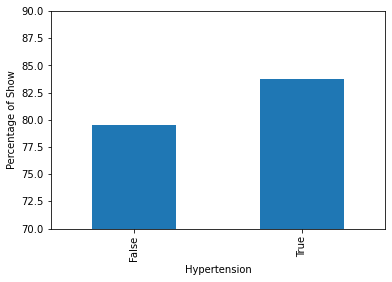

In [34]:
n_df.groupby('Hypertension').percentage.mean().plot(kind='bar')
plt.xlabel('Hypertension')
plt.ylabel('Percentage of Show')
plt.ylim([70,90])

(70.0, 90.0)

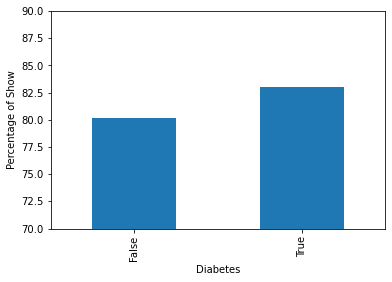

In [35]:
n_df.groupby('Diabetes').percentage.mean().plot(kind='bar')
plt.xlabel('Diabetes')
plt.ylabel('Percentage of Show')
plt.ylim([70,90])

(70.0, 90.0)

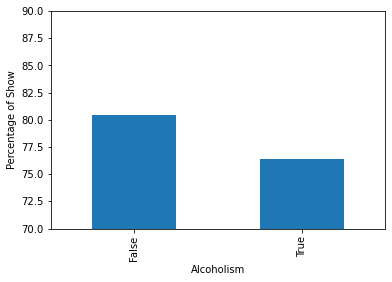

In [36]:
n_df.groupby('Alcoholism').percentage.mean().plot(kind='bar')
plt.xlabel('Alcoholism')
plt.ylabel('Percentage of Show')
plt.ylim([70,90])

,Diabetes,Hypertension,percentage
0,False,False,79.502636
1,False,True,83.813385
2,True,False,80.403239
3,True,True,83.607044


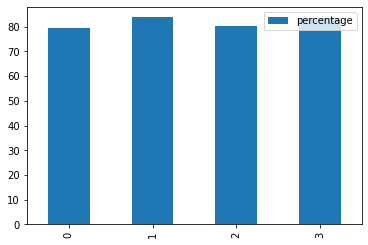

In [72]:
# percentage of show for multiple variables
n_df.groupby(['Diabetes','Hypertension']).agg({'percentage':'mean'}).reset_index().plot(kind='bar')
n_df.groupby(['Diabetes','Hypertension']).agg({'percentage':'mean'}).reset_index()


#### Does an sms reminder help patients show more ?

The percentage of show according to number of messages sent isn't indicative enough.
The subplots below show that the number of patients who had 1 appointment and didn't recieve any message is almost double the number of patients who had 1 appointment and recieved a message.

The number of patients who haven't recieved any messages is obviously very high, and patients who recieved more than 2 messegaes are few. 


However, counterintuitively, the percentage of show drops with more sms sent.

(0.0, 105.0)

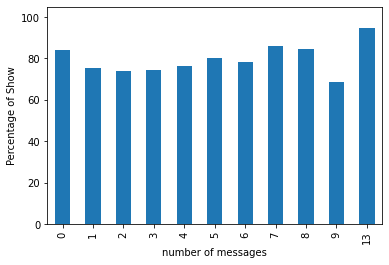

In [77]:
#percentage of show for number of messages recieved
n_df.groupby('num_sms').percentage.mean().plot(kind='bar')
plt.xlabel('number of messages')
plt.ylabel('Percentage of Show')
plt.ylim([0,105])


Text(0, 0.5, 'Number of patients')

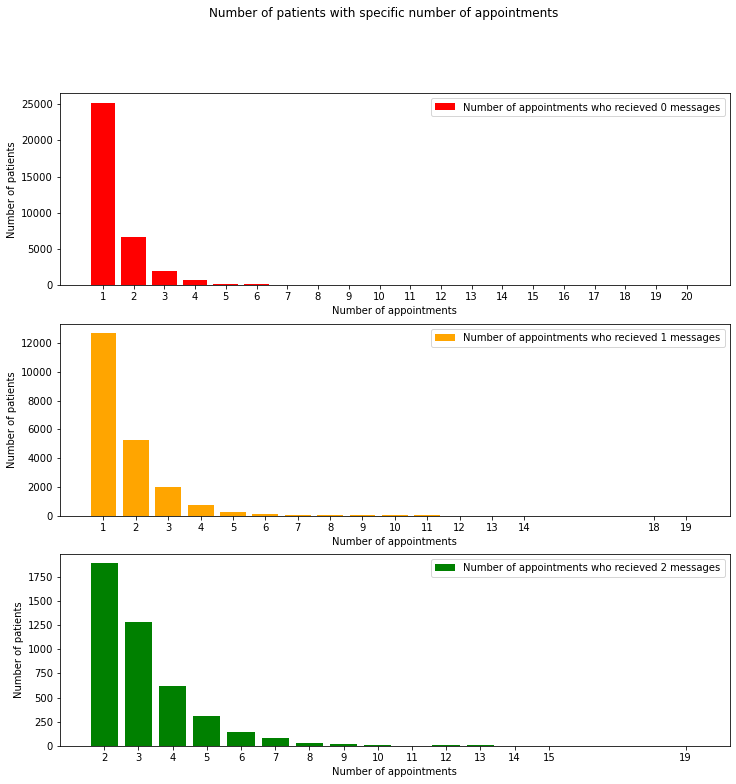

In [90]:
f =n_df.groupby('num_sms').appointments_count.value_counts()
fig, axs = plt.subplots(3,figsize=(12, 12))
fig.suptitle('Number of patients with specific number of appointments')

axs[0].bar(f[0].index, f[0], label='Number of appointments who recieved 0 messages', color='red', tick_label=f[0].index.astype(str))
axs[0].legend()
axs[0].set_xlabel('Number of appointments') 
axs[0].set_ylabel('Number of patients') 

axs[1].bar(f[1].index, f[1], label='Number of appointments who recieved 1 messages', color='orange',tick_label=f[1].index.astype(str))
axs[1].legend()
axs[1].set_xlabel('Number of appointments') 
axs[1].set_ylabel('Number of patients') 

axs[2].bar(f[2].index, f[2], label='Number of appointments who recieved 2 messages', color='green', tick_label=f[2].index.astype(str))
axs[2].legend()
axs[2].set_xlabel('Number of appointments') 
axs[2].set_ylabel('Number of patients') 

Text(0.5, 1.0, 'Patients who had 1 appointment scheduled')

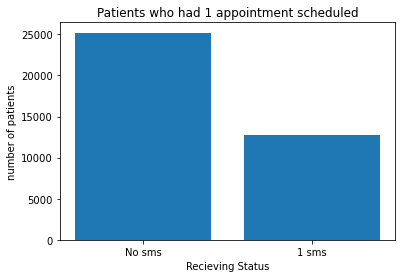

In [39]:
plt.bar(x= [0,1], height=[f[0].values[0], f[1].values[0]], tick_label=['No sms', '1 sms'])
plt.xlabel('Recieving Status')
plt.ylabel('number of patients')
plt.title('Patients who had 1 appointment scheduled')

<a id='conclusions'></a>
## Summary and Conclusions

The dataset described information about patients in Brazil. the goal was to be able to predict why roughly 20% of the patients do not show to their appointments. 110527 entries were included. The cleaning of data included renaming, data types changing and dropping columns outside the scope of the questions.

The dataset was also reconstructed to have each `patientID` associated with one record where number of appointments and percentage of show were calculayed into a new data frame.

When investigating the number of appointments per patient, there were numbers that were very high and unrealistic withing the given time frame of the data which is 27 days within 40 days. it is unlikely for a patient to visit or even schedule high numbers of appointments during this period. 
Also, the average of number of appointments per patient in 1.77, 99.9% percentile of the number of the appointments is 17, therefore appointments above 20 per patient will be disregarded in the analysis. The records of 35 patients corresponding to 1531 records were removed as a solution.

#### Conclusions about this dataset are shown according to questions asked and respective answers explored.
The table below summarizes the conclusions

From the new dataframe, the data was mostly studied relative to the percentage of show of patients groups. 

| Question | Conclusion | Definite predictor? |
| :- | :- | :-
| Do patients with more appointments commit more than those with less? | Number of appointments seems to not affect the show percentage | No
| Does having a scholarship increase the probability of showing at appointments? | Percentage of show is slightly lower for people with scholarship | No
| Does the age of the patient affect their commitment to show or not? | it seems that the most committed patients to show to appointments are older patients above 56 years old | Yes
| Does the handicap level (from 0 to 4) and cronic diseases affect patients showing at appointments | Higher Handicap level decreases show percentage. Patients with Hypertension and Diabetes show more than patients who don't have these diseases. Alcoholic patients show significantly less to appointments than patients who aren't alcoholic | Yes
| Does an sms reminder help patients show more ? | The number of patients who haven't recieved any messages is obviously very high, and patients who recieved more than 2 messegaes are few. However, counterintuitively, the percentage of show drops with more sms sent. | Yes

#### Limitations and comments

* The first observation of having very high number of appointments for some patients indicated either an entry error or maybe something more serious such as impirsonification of patients IDs.
* The handicap level seemed also unclear, a patient with one handicap condition could be rendered as better commited to appointments, however, the medical facilities coudl be not equipped for this specific condition.
* The result of recieving a reminder of the appointment was a bit puzzling, as a trend shows that more messages reduces the probability of showing which seems counterintuitive
* The number of patients who had 1 appointment and didn't recieve any message is almost double the number of patients who had 1 appointment and recieved a message.
